In [1]:
#Преобразование Фурье
#Демешко Алеся, 795

In [420]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

In [421]:
#Быстрое преобразование Фурье (fast Fourier transform) — это метод, позволяющий вычислять ДПФ за время O(n \log n).
#Этот метод основывается на свойствах комплексных корней из единицы (а именно, на том, что степени одних корней
#дают другие корни).
def FFT(vector):
    n = len(vector)
    logn = math.floor(math.log2(n))
    if 2**logn != n:
        for i in range (n, 2**(logn + 1)):
            vector.append(0)
        n = 2**(logn + 1)
    a = cmath.exp(-2*(math.pi)*1j / n)
    if n > 1:
        even_numbers = []
        odd_numbers = []
        for i in range(0, n, 2):
            even_numbers.append(vector[i])
            if((i + 1) < n):
                odd_numbers.append(vector[i + 1])
        vector = FFT(even_numbers) + FFT(odd_numbers)
        for j in range (n//2):
            old_vector = vector[j]
            vector[j] += vector[j + n//2] * a**j
            vector[j + n//2] = old_vector - vector[j + n//2] * a**j
    return vector

In [422]:
def InverseFFT(vector):
    n = len(vector)
    vec = FFT(np.asarray(vector).conjugate().tolist())
    vec = np.asarray(vec).conjugate() / n
    return vec

In [423]:
#Декоратор для построения начальной функции
def decorator(func):
    def wrapper(str, axis):
        a = np.arange(0.1, 10, 0.01)
        plt.title(str)
        plt.figure(1)
        plt.axis(axis)
        plt.plot(a, func(a), color = 'red')
        plt.show()
    return wrapper

In [424]:
#Убираем несколько последних коэффициентов D
def FFT_delete_d(vector, D):
    values = list(vector)
    length = len(vector)
    n = length
    if 2**math.floor(math.log2(n)) != n:
        for i in range (n, 2**(math.floor(math.log2(n)) + 1)):
            values.append(0)        
        n = 2**(math.floor(math.log2(n)) + 1)
    transformed = FFT(values)
    for i in range(length - D, length):
        transformed[i] = 0
    vec = InverseFFT(transformed)
    answer = []
    for x in vec[:length]:
        answer.append(x.real)
    return answer

In [425]:
def differences(vectorX, vectorY):
    Y1 = FFT_delete_d(Y0, 1)
    Y2 = FFT_delete_d(Y0, 5)
    Y3 = FFT_delete_d(Y0, 10)
    Y4 = FFT_delete_d(Y0, 50)
    Y5 = FFT_delete_d(Y0, 100)
    Y6 = FFT_delete_d(Y0, 500)
    plt.figure(1)
    plt.plot(vectorX, Y1, vectorX, Y2, vectorX, Y3, vectorX, Y4, vectorX, Y5, vectorX, Y6)
    plt.title('Compare')

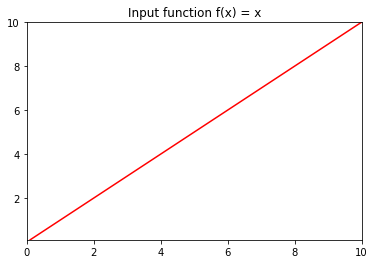

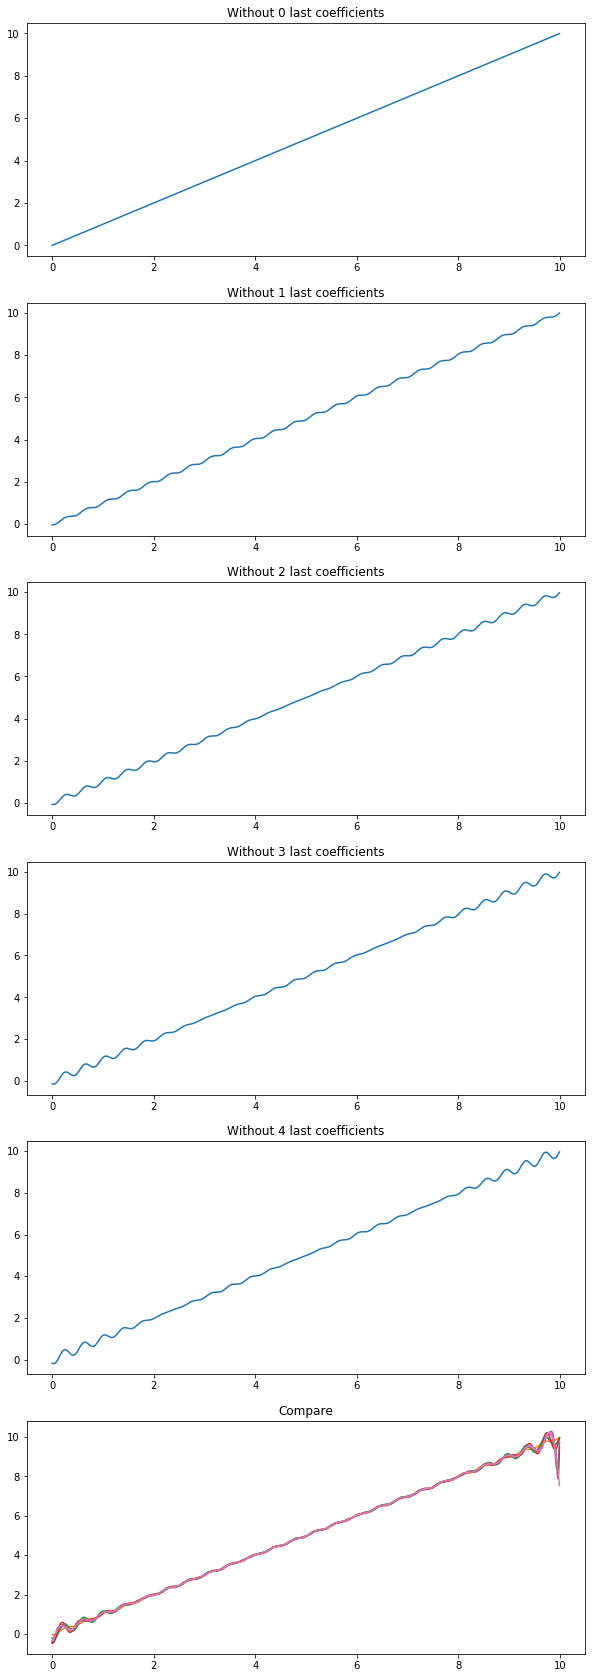

In [426]:
def f(x):
    return x

a = np.arange(0.1, 10, 0.01)
axis = [0, 10, min(f(a)), max(f(a))]
f_dec = decorator(f)
f_dec("Input function f(x) = x", axis)

X = []
for x in range(1000):
    X.append(x * 0.01)
Y0 = []
for x in X:
    y = f(x)
    Y0.append(y)
plt.figure(figsize = (10, 30))
count = 6
for i in range(count):
    Y = FFT_delete_d(Y0, i)
    plt.subplot(count, 1, i + 1)
    plt.plot(X, Y)
    plt.title('Without ' + str(i) + ' last coefficients')
    
Y = FFT_delete_d(Y0, i)
differences(X, Y)

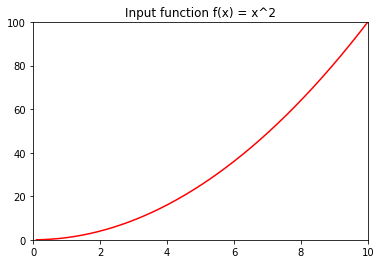

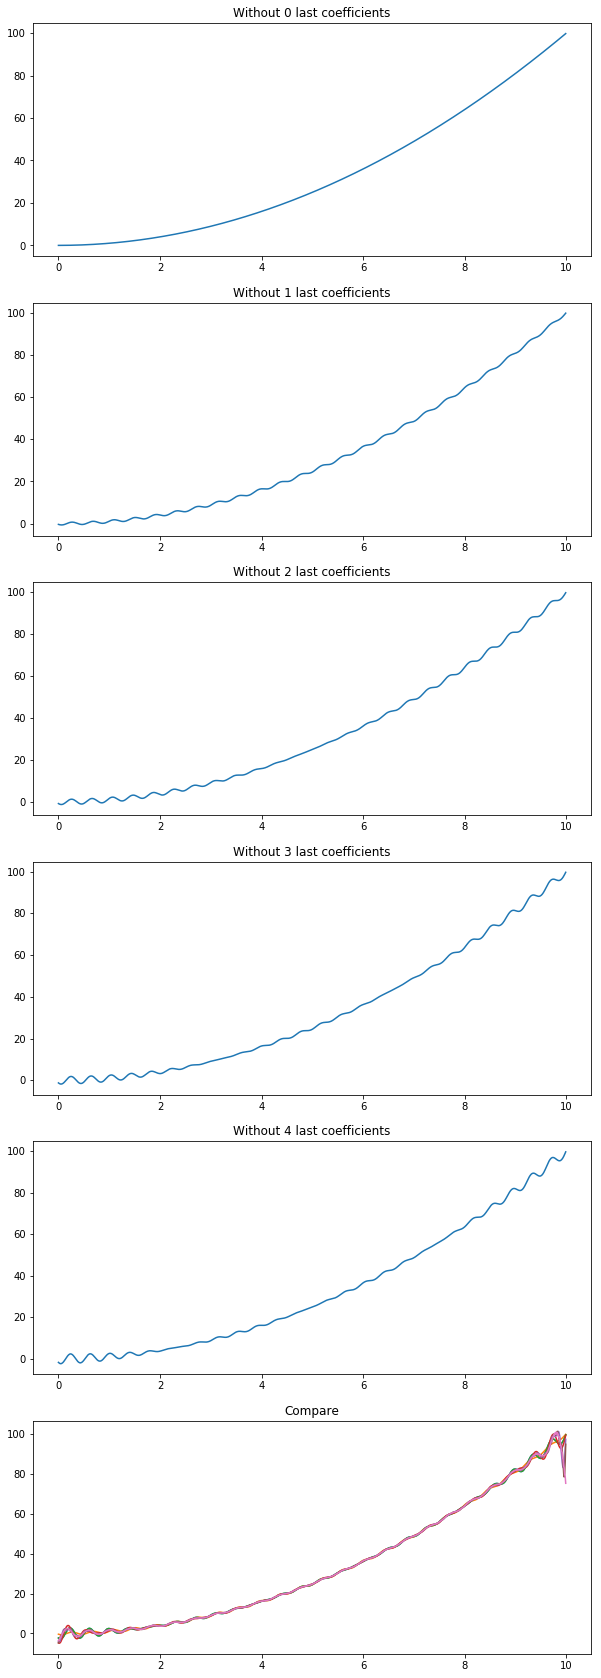

In [427]:
def f(x):
    return x ** 2

a = np.arange(0.1, 10, 0.01)
axis = [0, 10, min(f(a)), max(f(a))]
f_dec = decorator(f)
f_dec("Input function f(x) = x^2", axis)

X = []
for x in range(1000):
    X.append(x * 0.01)
Y0 = []
for x in X:
    y = f(x)
    Y0.append(y)
plt.figure(figsize = (10, 30))
count = 6
for i in range(count):
    Y = FFT_delete_d(Y0, i)
    plt.subplot(count, 1, i + 1)
    plt.plot(X, Y)
    plt.title('Without ' + str(i) + ' last coefficients')
    
Y = FFT_delete_d(Y0, i)
differences(X, Y)

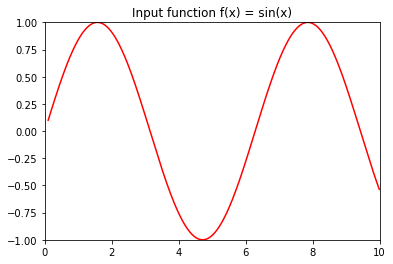

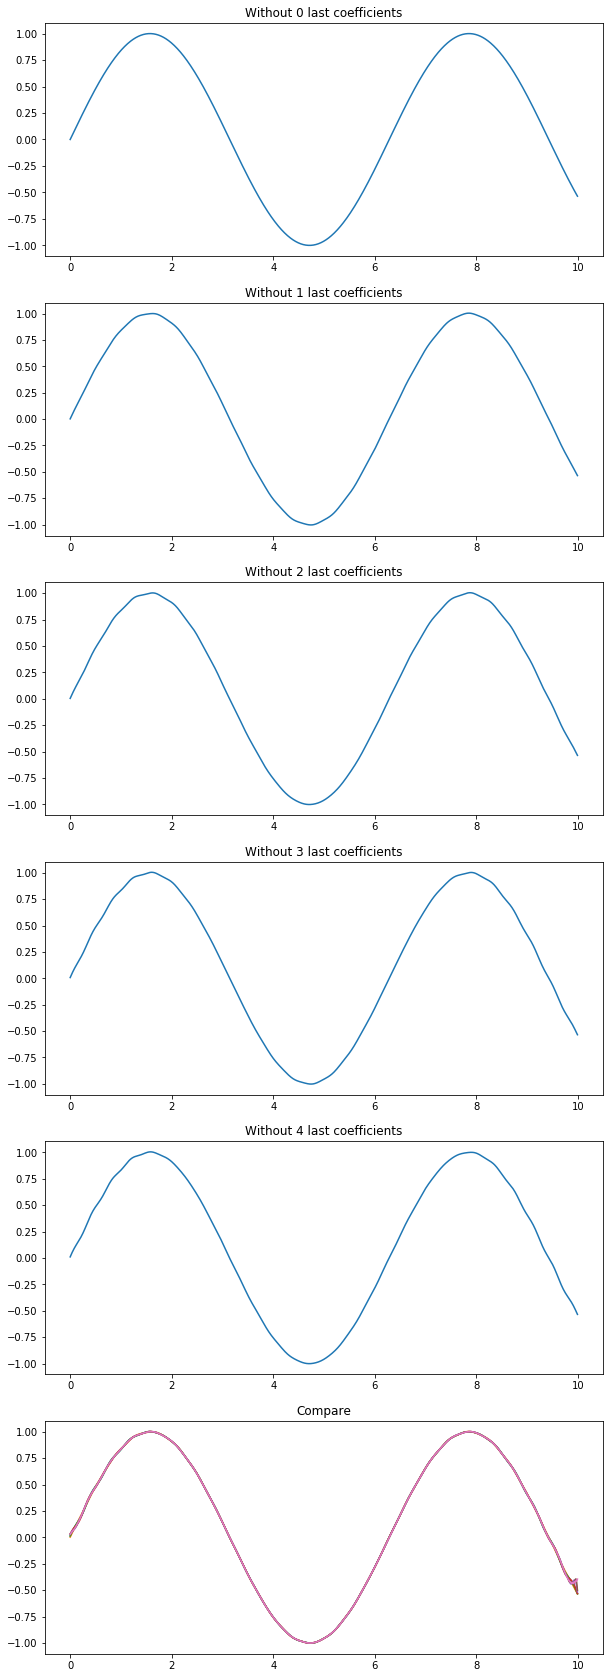

In [428]:
def f(x):
    return np.sin(x)

a = np.arange(0.1, 10, 0.01)
axis = [0, 10, min(f(a)), max(f(a))]
f_dec = decorator(f)
f_dec("Input function f(x) = sin(x)", axis)

X = []
for x in range(1000):
    X.append(x * 0.01)
Y0 = []
for x in X:
    y = f(x)
    Y0.append(y)
plt.figure(figsize = (10, 30))
count = 6
for i in range(count):
    Y = FFT_delete_d(Y0, i)
    plt.subplot(count, 1, i + 1)
    plt.plot(X, Y)
    plt.title('Without ' + str(i) + ' last coefficients')
    
Y = FFT_delete_d(Y0, i)
differences(X, Y)

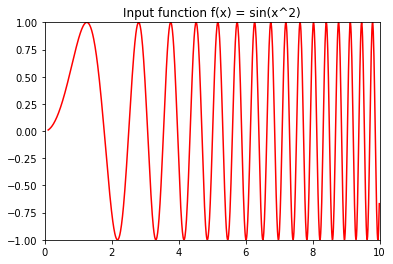

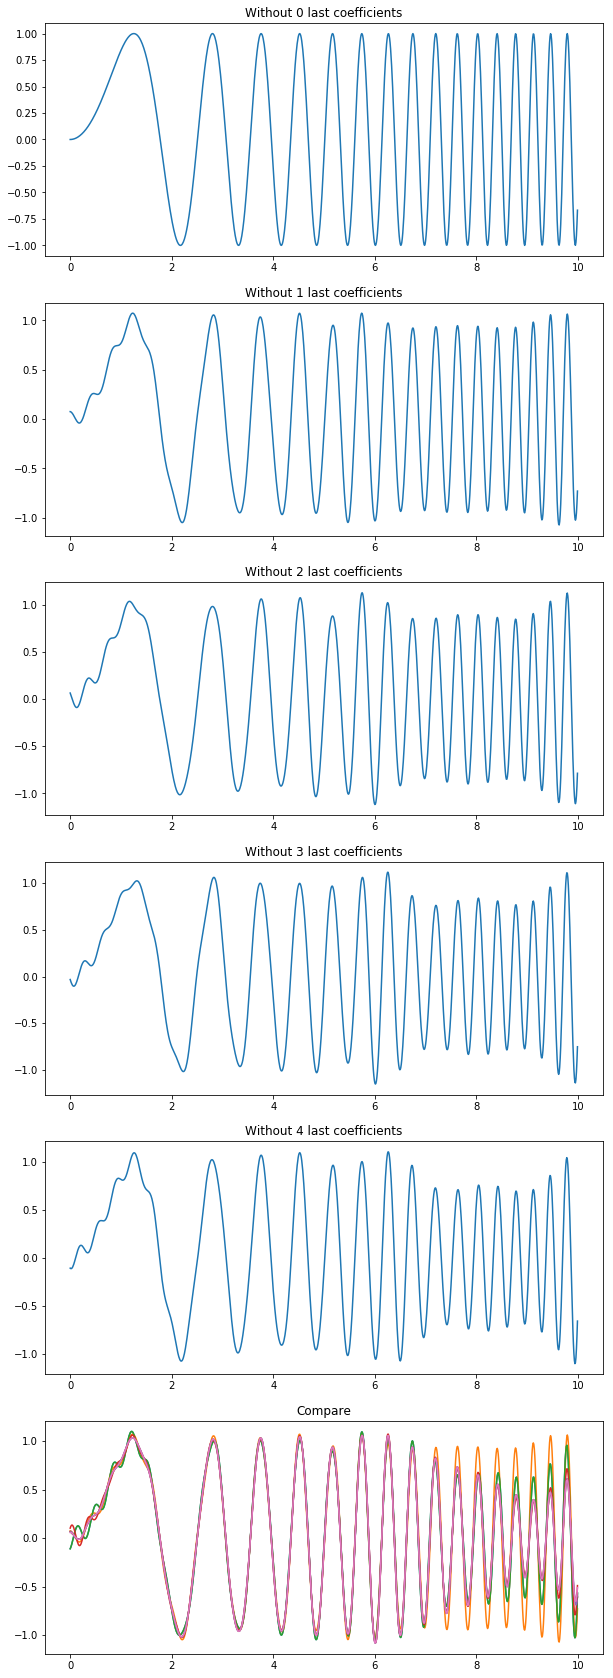

In [429]:
def f(x):
    return np.sin(x**2)

a = np.arange(0.1, 10, 0.01)
axis = [0, 10, min(f(a)), max(f(a))]
f_dec = decorator(f)
f_dec("Input function f(x) = sin(x^2)", axis)

X = []
for x in range(1000):
    X.append(x * 0.01)
Y0 = []
for x in X:
    y = f(x)
    Y0.append(y)
plt.figure(figsize = (10, 30))
count = 6
for i in range(count):
    Y = FFT_delete_d(Y0, i)
    plt.subplot(count, 1, i + 1)
    plt.plot(X, Y)
    plt.title('Without ' + str(i) + ' last coefficients')

Y = FFT_delete_d(Y0, i)
differences(X, Y)

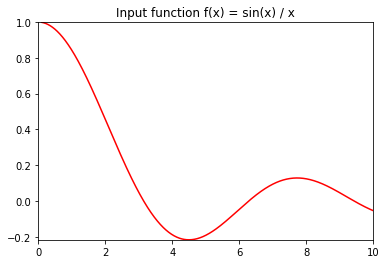

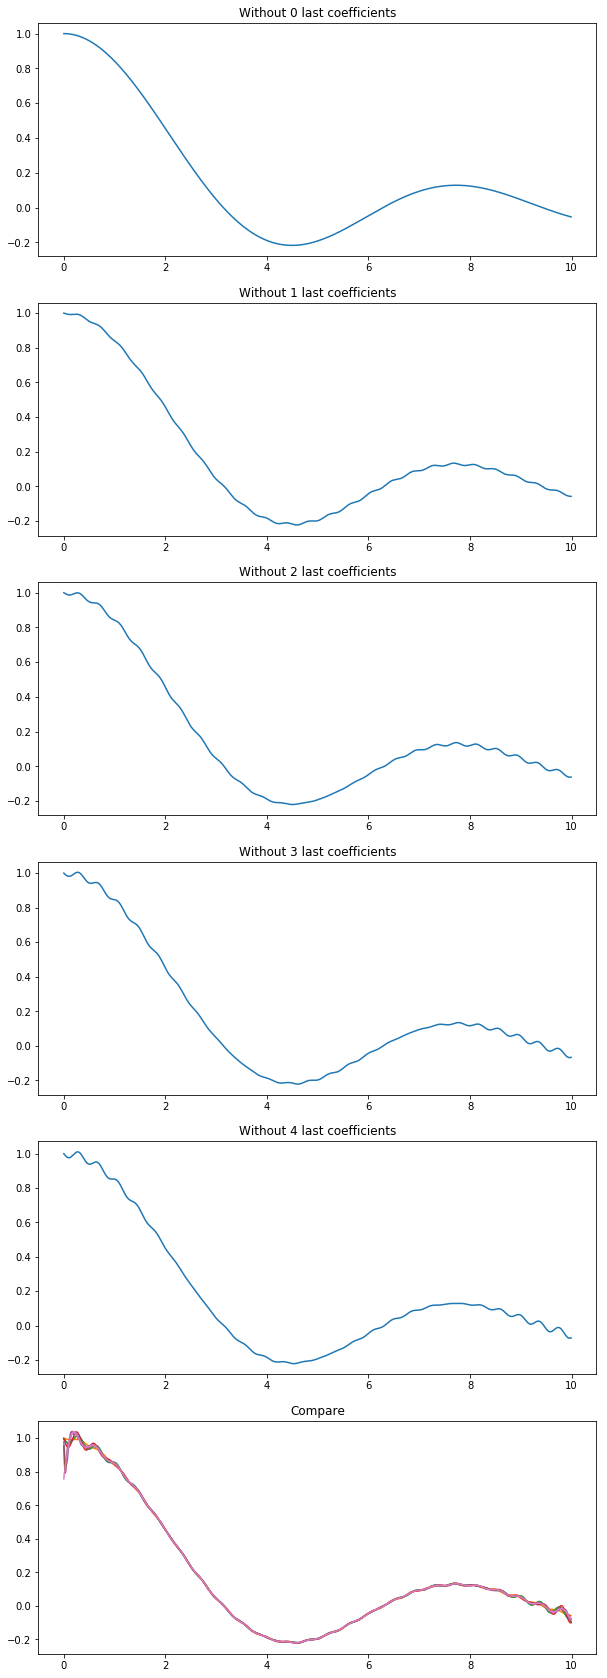

In [430]:
def f(x):
    if type(x) == float and x == 0:
        return 1
    return np.sin(x) / (x)

a = np.arange(0.1, 10, 0.01)
axis = [0, 10, min(f(a)), max(f(a))]
f_dec = decorator(f)
f_dec("Input function f(x) = sin(x) / x", axis)

X = []
for x in range(1000):
    X.append(x * 0.01)
Y0 = []
for x in X:
    y = f(x)
    Y0.append(y)
plt.figure(figsize = (10, 30))
count = 6
for i in range(count):
    Y = FFT_delete_d(Y0, i)
    plt.subplot(count, 1, i + 1)
    plt.plot(X, Y)
    plt.title('Without ' + str(i) + ' last coefficients')
    
Y = FFT_delete_d(Y0, i)
differences(X, Y)